In [10]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
imagePath = "/content/drive/My Drive/Colab Notebooks/AVDLC/train/images/"
trainFilePath = "/content/drive/My Drive/Colab Notebooks/AVDLC/train/train.csv"
testFilePath = "/content/drive/My Drive/Colab Notebooks/AVDLC/train/test_ApKoW4T.csv"


In [0]:
import pandas as pd
train = pd.read_csv(trainFilePath)
test = pd.read_csv(testFilePath)

In [22]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [55]:
test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [0]:
from PIL import Image
import numpy as np
train_images = np.array(train.iloc[:,0])
test_images = np.array(test.iloc[:,0])
trainimagearr=[]
for i in train_images:
    try:
      img=Image.open(imagePath+i).convert('L').resize((128,128))
      trainimagearr.append(np.array(img))
    except:
      print(i,' problem in this file')
testimagearr = []
for i in test_images:
    try:
      img = Image.open(imagePath+i).convert('L').resize((128,128))
      testimagearr.append(np.array(img))
    except:
      print(i, ' problem in this file')
    

In [15]:
train_img=np.array(trainimagearr)
print(train_img.shape)
test_img=np.array(testimagearr)
print(test_img.shape)

(6252, 128, 128)
(2680, 128, 128)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

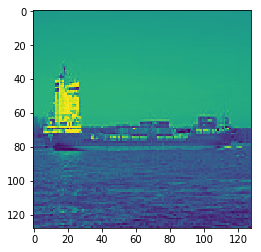

In [19]:
plt.imshow(train_img[0])

In [20]:
train_img=train_img.reshape(-1, 128, 128, 1)
print(train_img.shape)
test_img=test_img.reshape(-1, 128, 128, 1)
test_img.shape

(6252, 128, 128, 1)


(2680, 128, 128, 1)

In [0]:
train_img=train_img/train_img.max()
test_img=test_img/test_img.max()

In [0]:
train_y = np.array(train.category)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_img, train_y, test_size=0.2, random_state=45)

In [25]:
from sklearn.preprocessing import LabelEncoder
import keras
import keras.utils
from keras import utils as np_utils
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_val = np_utils.to_categorical(lb.fit_transform(y_val))

Using TensorFlow backend.


In [26]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(5001, 128, 128, 1) (5001, 5)
(1251, 128, 128, 1) (1251, 5)


In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
num_classes = 5
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3),activation='linear',input_shape=(128,128,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(512, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#model.add(Conv2D(512, (3, 3), activation='linear',padding='same'))
#model.add(LeakyReLU(alpha=0.1))                  
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
                 
#model.add(Dense(128, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [44]:
batch_size = 40
epochs = 30
train = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,y_val))

Train on 5001 samples, validate on 1251 samples
Epoch 1/30
5001/5001 [==============================] - 110s 22ms/step - loss: 1.5389 - acc: 0.4117 - val_loss: 1.1728 - val_acc: 0.5212
Epoch 2/30
5001/5001 [==============================] - 109s 22ms/step - loss: 1.0321 - acc: 0.5929 - val_loss: 1.1570 - val_acc: 0.5356
Epoch 3/30
5001/5001 [==============================] - 108s 22ms/step - loss: 0.7422 - acc: 0.7139 - val_loss: 1.2043 - val_acc: 0.5516
Epoch 4/30
5001/5001 [==============================] - 109s 22ms/step - loss: 0.4634 - acc: 0.8184 - val_loss: 1.2883 - val_acc: 0.5923
Epoch 5/30
5001/5001 [==============================] - 108s 22ms/step - loss: 0.2670 - acc: 0.9082 - val_loss: 1.4343 - val_acc: 0.6019
Epoch 6/30
5001/5001 [==============================] - 108s 22ms/step - loss: 0.1328 - acc: 0.9588 - val_loss: 1.5941 - val_acc: 0.6483
Epoch 7/30
5001/5001 [==============================] - 108s 22ms/step - loss: 0.0480 - acc: 0.9896 - val_loss: 1.7469 - val_acc: 

In [0]:
predict = model.predict(test_img)

In [0]:
y_classes = predict.argmax(axis=-1)

In [0]:
a =[]
for i in y_classes:
   a.append(i+1)

In [56]:
sub=pd.DataFrame({'image':test.image, 'HeadCount':a})
sub.sample(20)

,image,HeadCount
2511,2902591.jpg,5
117,1645622.jpg,4
449,2691286.jpg,5
2421,2896587.jpg,5
2583,2909310.jpg,5
2279,2890453.jpg,5
1534,2847442.jpg,3
1759,2860035.jpg,1
2567,2904729.jpg,1
2559,2904651.jpg,5


In [0]:
sub.to_csv('/content/drive/My Drive/Colab Notebooks/AVDLC/train/results.csv',index=False)